<a href="https://colab.research.google.com/github/arijitbhowal/Streamlit-Background-Remover/blob/main/Background_Removal_Using_SegmentAnythingModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# install requirements
!pip install git+https://github.com/facebookresearch/segment-anything.git
!pip install torch torchvision opencv-python numpy

  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-iuevjswy
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-iuevjswy
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done
  Created wheel for segment-anything: filename=segment_anything-1.0-py3-none-any.whl size=36587 sha256=6e9bf82166ef401263294244f4e21bbe5a7bd7f32f189edcaf01d03ff65ba887
  Stored in directory: /tmp/pip-ephem-wheel-cache-t_wspfp1/wheels/10/cf/59/9ccb2f0a1bcc81d4fbd0e501680b5d088d690c6cfbc02dc99d
Successfully built segment-anything


In [ ]:
#Create Segment Anything Model Predictor
import os
from segment_anything import SamPredictor, sam_model_registry
model_path="./sam_vit_b_01ec64.pth"
if not os.path.exists(model_path):
  !wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth

sam = sam_model_registry["vit_b"](checkpoint=model_path)
predictor = SamPredictor(sam)

--2024-01-01 04:43:06--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 65.8.243.97, 65.8.243.119, 65.8.243.25, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|65.8.243.97|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 375042383 (358M) [binary/octet-stream]
Saving to: ‘sam_vit_b_01ec64.pth’

sam_vit_b_01ec64.pt 100%[===================>] 357.67M   136MB/s    in 2.6s    

2024-01-01 04:43:08 (136 MB/s) - ‘sam_vit_b_01ec64.pth’ saved [375042383/375042383]



In [ ]:
import os
import cv2

image_path = "./test.jpg"
if not os.path.exists(image_path):
    !wget https://c.pxhere.com/photos/f2/6b/beautiful_blurred_background_child_countryside_daylight_daytime_eyeglasses_face-1571827.jpg!s -O {image_path}

x = 262
y = 198

image = cv2.imread(image_path)

# Check if the image was successfully loaded
if image is not None:
    # Save the image with the same filename
    cv2.imwrite(image_path, image)
    print(f"Image saved successfully as {image_path}")
else:
    print("Failed to load the image.")


--2024-01-01 04:43:12--  https://c.pxhere.com/photos/f2/6b/beautiful_blurred_background_child_countryside_daylight_daytime_eyeglasses_face-1571827.jpg!s
Resolving c.pxhere.com (c.pxhere.com)... 172.67.70.214, 104.26.12.7, 104.26.13.7, ...
Connecting to c.pxhere.com (c.pxhere.com)|172.67.70.214|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33919 (33K) [image/jpeg]
Saving to: ‘./test.jpg’

./test.jpg          100%[===================>]  33.12K  --.-KB/s    in 0s      

2024-01-01 04:43:12 (97.6 MB/s) - ‘./test.jpg’ saved [33919/33919]

Image saved successfully as ./test.jpg


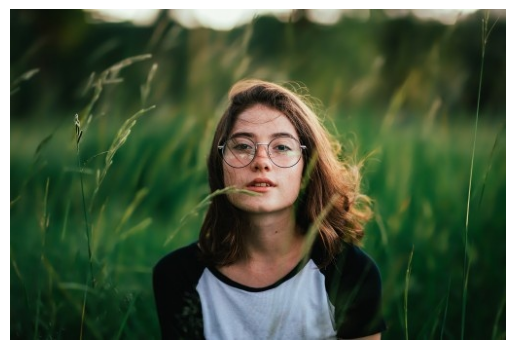

In [ ]:
import cv2
from matplotlib import pyplot as plt

# Read an image from file
image = cv2.imread('test.jpg')

# Convert BGR to RGB (OpenCV uses BGR by default)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image using Matplotlib
plt.imshow(image_rgb)
plt.axis('off')  # Turn off axis labels
plt.show()

In [ ]:
print(type(image))
print(image.shape if image is not None else "Image is None")


<class 'numpy.ndarray'>
(340, 510, 3)


In [ ]:
#Use Segment Anything Model Predictor on (image,x,y) to get location of subject
import numpy as np

predictor.set_image(image)

masks,scores,logits=predictor.predict(
                              point_coords=np.asarray([[x,y]]),
                              point_labels=np.asarray([1]),
                              multimask_output=True
                              )

C,H,W=masks.shape

result_mask = np.zeros((H, W), dtype=bool)

for j in range(C):
  result_mask=masks[j,:,:]

result_mask=result_mask.astype(np.uint8)


In [ ]:
#Remove Background
alpha_channel = np.ones(result_mask.shape, dtype=result_mask.dtype) * 255

alpha_channel[result_mask == 0] = 0

result_image = cv2.merge((image, alpha_channel))

In [ ]:
def remove_background(image,x,y):
  predictor.set_image(image)

  masks,scores,logits=predictor.predict(
                                point_coords=np.asarray([[x,y]]),
                                point_labels=np.asarray([1]),
                                multimask_output=True
                                )

  C,H,W=masks.shape

  result_mask = np.zeros((H, W), dtype=bool)

  for j in range(C):
    result_mask=masks[j,:,:]

  result_mask=result_mask.astype(np.uint8)

  alpha_channel = np.ones(result_mask.shape, dtype=result_mask.dtype) * 255

  alpha_channel[result_mask == 0] = 0

  result_image = cv2.merge((image, alpha_channel))

  return result_image

In [ ]:
import os
import cv2

image_path = "./test.jpg"
if not os.path.exists(image_path):
    !wget https://c.pxhere.com/photos/f2/6b/beautiful_blurred_background_child_countryside_daylight_daytime_eyeglasses_face-1571827.jpg!s -O {image_path}

x = 262
y = 198

image = cv2.imread(image_path)

# Check if the image was successfully loaded
if image is not None:
    # Save the image with the same filename
    cv2.imwrite(image_path, image)
    print(f"Image saved successfully as {image_path}")
else:
    print("Failed to load the image.")

result_image = remove_background(image,x,y)



Image saved successfully as ./test.jpg


In [ ]:

# wrap it up as a function
import base64
import os

from segment_anything import SamPredictor, sam_model_registry
import cv2
import numpy as np


model_path = './sam_vit_b_01ec64.pth'
if not os.path.exists(model_path):
  !wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth

sam = sam_model_registry["vit_b"](checkpoint=model_path)
predictor = SamPredictor(sam)

#Take image as base64 encoding as we cannot fetch iamge as numpy array from api
def remove_background(image_base64_encoding, x, y):
  #decode the base64 image into numpy array
  image_bytes = base64.b64decode(image_base64_encoding)

  image = cv2.imdecode(np.frombuffer(image_bytes, dtype=np.uint8), cv2.IMREAD_COLOR)

  predictor.set_image(image)

  masks, scores, logits = predictor.predict(
                                    point_coords=np.asarray([[x, y]]),
                                    point_labels=np.asarray([1]),
                                    multimask_output=True
                                )

  C, H, W = masks.shape

  result_mask = np.zeros((H, W), dtype=bool)

  for j in range(C):
    result_mask |= masks[j, :, :]

  result_mask = result_mask.astype(np.uint8)

  alpha_channel = np.ones(result_mask.shape, dtype=result_mask.dtype) * 255

  alpha_channel[result_mask == 0] = 0

  result_image = cv2.merge((image, alpha_channel))


  #Convert result to bytes and encode into base64
  _, result_image_bytes = cv2.imencode('.png', result_image)

  result_image_bytes = result_image_bytes.tobytes()

  result_image_bytes_encoded_base64 = base64.b64encode(result_image_bytes).decode('utf-8')

  return result_image_bytes_encoded_base64

Image saved successfully as ./test.jpg


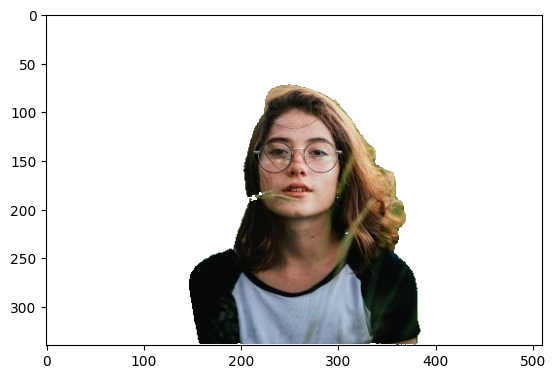

In [ ]:

import os
import cv2

image_path = "./test.jpg"
if not os.path.exists(image_path):
    !wget https://c.pxhere.com/photos/f2/6b/beautiful_blurred_background_child_countryside_daylight_daytime_eyeglasses_face-1571827.jpg!s -O {image_path}

x = 262
y = 198

image = cv2.imread(image_path)

# Check if the image was successfully loaded
if image is not None:
    # Save the image with the same filename
    cv2.imwrite(image_path, image)
    print(f"Image saved successfully as {image_path}")
else:
    print("Failed to load the image.")

_, image_bytes = cv2.imencode('.png', image)

image_bytes = image_bytes.tobytes()

image_bytes_encoded_base64 = base64.b64encode(image_bytes).decode('utf-8')

result_image = remove_background(image_bytes_encoded_base64, x, y)

result_image_bytes = base64.b64decode(result_image)

result_image = cv2.imdecode(np.frombuffer(result_image_bytes, dtype=np.uint8), cv2.IMREAD_UNCHANGED)

plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGRA2RGBA))
plt.show()

In [ ]:
!pip install modelbit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.1/114.1 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 32.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 91.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 85.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 11.3 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of types-requests to determine which version is compatible with other requirements. This could take a while.
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.7
    Uninstalling urllib3-2.0.7:
      Successfully uninstalled urllib3-2.0.7
  Attempting uninstall: build
    Found existing installation: build 1.0.3
    Uninstalling build-1.0.3:
      Successfully u

In [ ]:
import modelbit
mb = modelbit.login()

In [ ]:
mb.deploy(remove_background)

Uploading 'predictor': 100%|██████████| 348M/348M [00:11<00:00, 29.7MB/s]


Image saved successfully as ./test.jpg


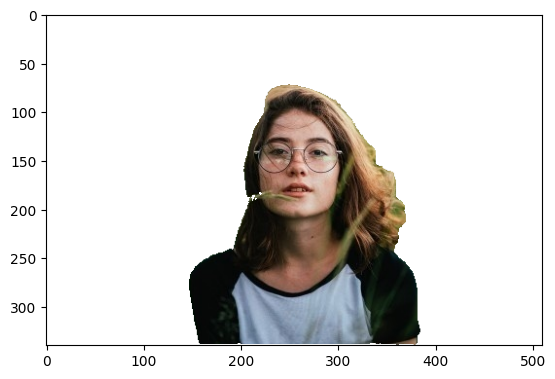

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import requests

api_endpoint='https://arijitbhowal.ap-south-1.modelbit.com/v1/remove_background/latest'

image_path = "./test.jpg"
if not os.path.exists(image_path):
    !wget https://c.pxhere.com/photos/f2/6b/beautiful_blurred_background_child_countryside_daylight_daytime_eyeglasses_face-1571827.jpg!s -O {image_path}

x = 262
y = 198

image = cv2.imread(image_path)

# Check if the image was successfully loaded
if image is not None:
    # Save the image with the same filename
    cv2.imwrite(image_path, image)
    print(f"Image saved successfully as {image_path}")
else:
    print("Failed to load the image.")

_, image_bytes = cv2.imencode('.png', image)

image_bytes = image_bytes.tobytes()

image_bytes_encoded_base64 = base64.b64encode(image_bytes).decode('utf-8')

api_data={'data':[image_bytes_encoded_base64,x,y]}
response=requests.post(api_endpoint, json=api_data)

result_image = response.json()['data']

result_image_bytes = base64.b64decode(result_image)

result_image = cv2.imdecode(np.frombuffer(result_image_bytes, dtype=np.uint8), cv2.IMREAD_UNCHANGED)

plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGRA2RGBA))
plt.show()